# Functions and Code (Annotated)
### Akash Rathi
### akash@u.northwestern.edu


In [2]:
#Assuming this is data with genders for all authors including those with initials for their first name.

import pandas as pd
import numpy as np
import statistics
import math

df = pd.read_csv('final_data.csv')

data = df

data = data.drop(['level_0','index'], axis = 1) #OPTIONAL ****only use if there are indices that were previously reset.

In [3]:
#Dropping all authors with initials for their first names

drop_list = []
for i,first in enumerate(data.first_author):
  first_name = first.split(',')[1]
  if len(first_name) <= 3:
    drop_list.append(i)

for i,first in enumerate(data.last_author):
  first_name = first.split(',')[1]
  if len(first_name) <= 3:
    drop_list.append(i)

data = data.drop(drop_list, axis=0).reset_index()

## Figure 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


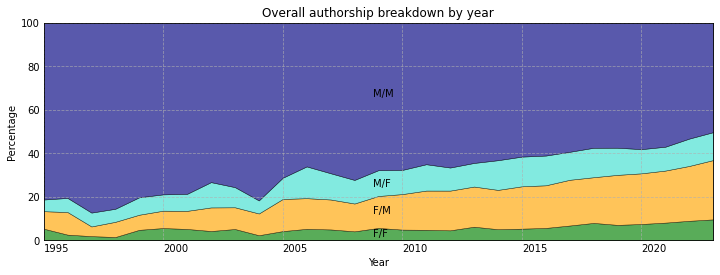

In [6]:
import matplotlib.pyplot as plt

def fig1_overall(data, labels=['F/F', 'F/M', 'M/F', 'M/M'],colors=['green', 'orange', 'turquoise', 'navy']):
    # Calculate the percentage of each category for each year
    percentage_data = data.groupby(['Publication Year', 'Gender']).size().reset_index(name='Count')
    percentage_data['Percentage'] = percentage_data.groupby('Publication Year')['Count'].transform(lambda x: (x / x.sum()) * 100)

    # Pivot the data for a stacked area plot
    stacked_data = percentage_data.pivot(index='Publication Year', columns='Gender', values='Percentage').fillna(0)

    # Create a stacked area plot
    plt.figure(figsize=(12, 4))
    stacks = plt.stackplot(stacked_data.index, stacked_data['F/F'], stacked_data['F/M'], 
                           stacked_data['M/F'], stacked_data['M/M'], 
                           colors=colors, 
                           alpha=0.65, linewidth=0.5, edgecolor='black')

    # Set plot labels and title
    plt.title('Overall authorship breakdown by year')
    plt.xlabel('Year')
    plt.ylabel('Percentage')

    # Round x-axis to the nearest whole number and rotate the x-values to the left
    x_ticks = range(int(stacked_data.index.min()), int(stacked_data.index.max()) + 1, 5)
    plt.xticks(x_ticks, rotation=0, ha='left')
    #plt.xticks([round(x) for x in stacked_data.index], rotation=45, ha='left')

    # Remove tick marks on both axes
    plt.tick_params(axis='both', which='both', length=0)

    # Change background color to white
    plt.gca().set_facecolor('white')

    # Add labels to each section
    for stack, label in zip(stacks, labels):
        path = stack.get_paths()[0]
        x_center = path.vertices[:, 0].mean()
        y_center = path.vertices[:, 1].mean()
        plt.text(x_center, y_center, label, color='black', va='center', ha='left')


    plt.grid(True, linestyle='--', alpha=0.7, zorder=0)


    # Remove the legend
    plt.legend().set_visible(False)

    # Add black borders to the entire plot
    plt.margins(0, 0)
    #plt.savefig('/content/drive/My Drive/BrownMedResearch/authorship_overall.pdf', format='pdf')

    # Show the plot
    plt.show()

#Calling the function
fig1_overall(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


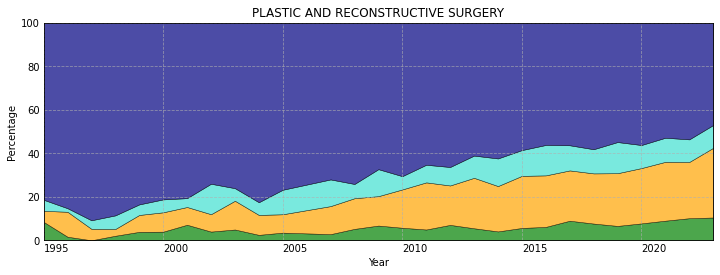

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


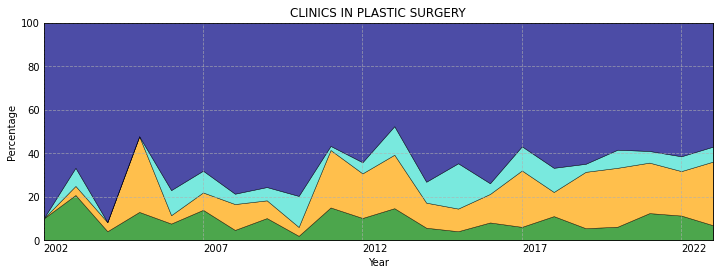

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


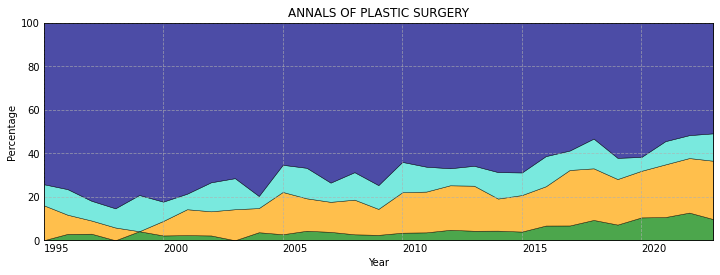

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


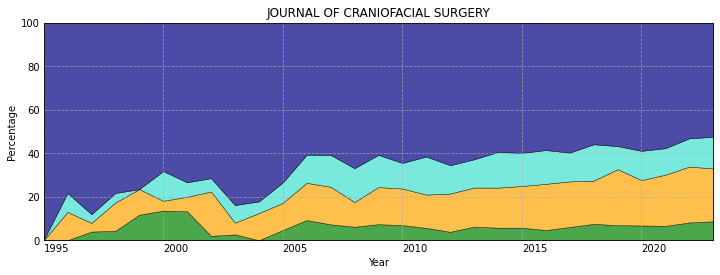

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


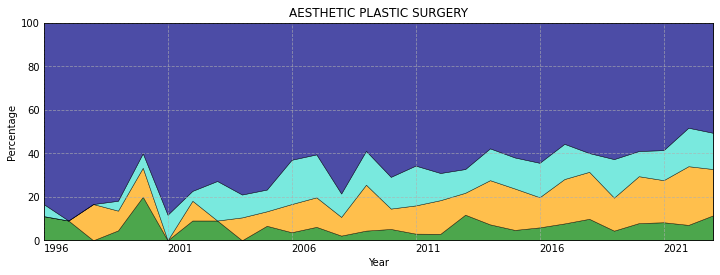

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


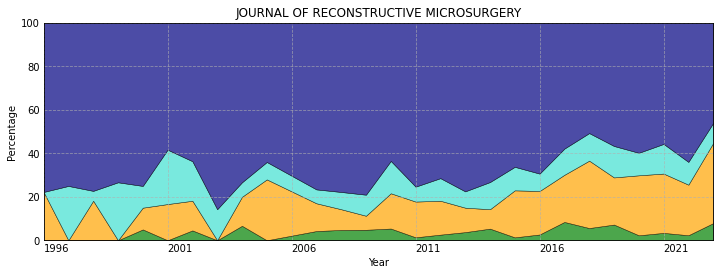

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


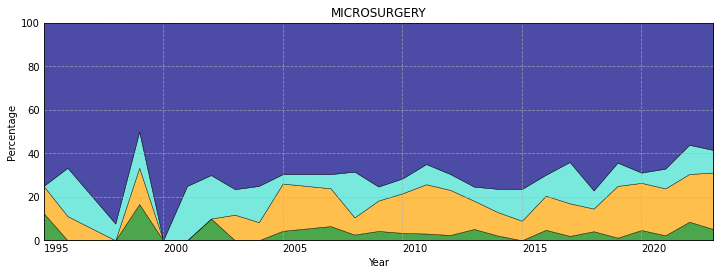

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


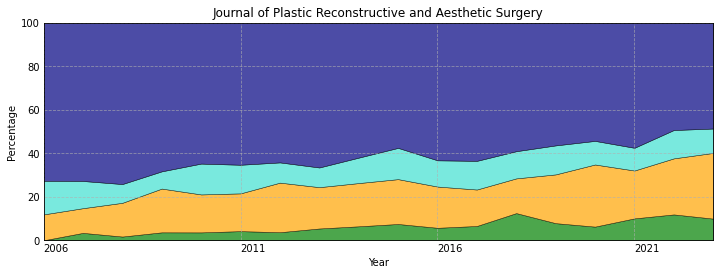

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


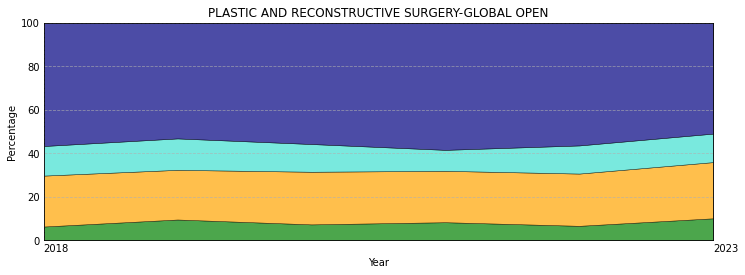

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


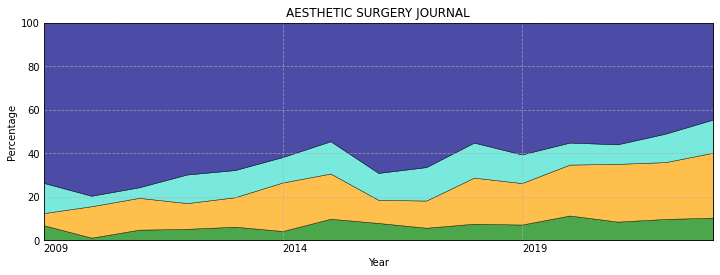

In [9]:
import matplotlib.pyplot as plt

def fig1_journal(data, colors=['green', 'orange', 'turquoise', 'navy']):
    # Iterate over unique journals
    for journal in data['Journal Name'].unique():
        # Filter data for the current journal
        journal_data = data[data['Journal Name'] == journal]

        # Calculate the percentage of each category for each year
        percentage_data = journal_data.groupby(['Publication Year', 'Gender']).size().reset_index(name='Count')
        percentage_data['Percentage'] = percentage_data.groupby('Publication Year')['Count'].transform(lambda x: (x / x.sum()) * 100)

        # Pivot the data for a stacked area plot
        stacked_data = percentage_data.pivot(index='Publication Year', columns='Gender', values='Percentage').fillna(0)

        # Create a stacked area plot
        plt.figure(figsize=(12, 4))
        stacks = plt.stackplot(stacked_data.index, stacked_data['F/F'], 
                               stacked_data['F/M'], stacked_data['M/F'], 
                               stacked_data['M/M'], colors=colors, 
                               alpha=0.7, linewidth=0.5, edgecolor='black')

        # Set plot labels and title
        plt.title(f'{journal}')
        plt.xlabel('Year')
        plt.ylabel('Percentage')

        # Round x-axis to the nearest whole number and rotate the x-values to the left
        x_ticks = range(int(stacked_data.index.min()), int(stacked_data.index.max()) + 1, 5)
        plt.xticks(x_ticks, rotation=0, ha='left')
        #plt.xticks([round(x) for x in stacked_data.index], rotation=45, ha='left')

        # Remove tick marks on both axes
        plt.tick_params(axis='both', which='both', length=0)

        # Change background color to white
        plt.gca().set_facecolor('white')

        # Add labels to each section
        #for stack, label in zip(stacks, ['F/F', 'F/M', 'M/F', 'M/M']):
         #   path = stack.get_paths()[0]
            #x_center = path.vertices[:, 0].quartile(0.75)
            #y_center = path.vertices[:, 1].mean()
          #  plt.text(x_center, y_center, label, color='black', va='bottom', ha='left')

        plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

        # Remove the legend
        plt.legend().set_visible(False)

        # Add black borders to the entire plot
        plt.margins(0, 0)

        #plt.savefig(f'/content/drive/My Drive/BrownMedResearch/{journal}_authorship.pdf', format='pdf')

        # Show the plot
        plt.show()

#Call the function
fig1_journal(data)

## Figure 2 (GAM Model Definitions + Code)

In [ ]:
pip install pygam

In [29]:
# Define a dataframe for your bootstrap values
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])

# Define a dataframe for your expected values
expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])

# Set your model data with relevant columns from your original dataset
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True)) &

                        ((model_data['Journal Name'] == 'JOURNAL OF CRANIOFACIAL SURGERY') |
                         (model_data['Journal Name'] == 'PLASTIC AND RECONSTRUCTIVE SURGERY') |
                         (model_data['Journal Name'] == 'ANNALS OF PLASTIC SURGERY') |
                         (model_data['Journal Name'] == 'Journal of Plastic Reconstructive and Aesthetic Surgery') |
                         (model_data['Journal Name'] == 'AESTHETIC PLASTIC SURGERY') )]



<ipython-input-29-31c791e2aaf2>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True)) &


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics


def gam_model(model_data, bootstrap_df, expected_df, bootstrap_name, expected_name, n_bootstrap=1000):
    # Define predictors and target
    X = model_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

    # Use LabelEncoder for categorical variables
    label_encoder = LabelEncoder()
    X_encoded = X.copy()
    X_encoded['Journal Name'] = label_encoder.fit_transform(X['Journal Name'])
    X_encoded['Publication Month'] = label_encoder.fit_transform(X['Publication Month'])

    y = model_data['M/M']  # Assuming 'M/M' is the category to predict

    # Number of bootstrap iterations
    n_bootstrap = n_bootstrap

    lam = 0.01

    # Initialize list to store bootstrap results
    bootstrap_results = []

    # Fit the GAM model
    gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

    # Predict the probabilities for each category and normalize
    probabilities = gam.predict(X_encoded)

    ###DEFINE SAMPLES###
    n_samples = round(0.20*len(y))

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_encoded_reset_index = X_encoded.reset_index(drop=True)
        X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
        y_bootstrap = y.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

        # Calculate over- and undercitation measures
        observed_proportions = model_data['M/M']
        expected_proportions_bootstrap = expected_bootstrap

        delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)

    bootstrap_df['M/M_bootstrap_vals'] = bootstrap_results
    expected_df['M/M_expected'] = expected_proportions_bootstrap

    # Calculate the 95% confidence interval
    mm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

    # Print the confidence interval
    print(f'95% Confidence Interval: {mm_confidence_interval}')



    y = model_data['M/F']  # Assuming 'M/M' is the category to predict

    # Number of bootstrap iterations


    # Initialize list to store bootstrap results
    bootstrap_results = []

    # Fit the GAM model
    gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

    # Predict the probabilities for each category and normalize
    probabilities = gam.predict(X_encoded)

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_encoded_reset_index = X_encoded.reset_index(drop=True)
        X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
        y_bootstrap = y.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

        # Calculate over- and undercitation measures
        observed_proportions = model_data['M/F']
        expected_proportions_bootstrap = expected_bootstrap

        delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)

    bootstrap_df['M/F_bootstrap_vals'] = bootstrap_results
    expected_df['M/F_expected'] = expected_proportions_bootstrap
    # Calculate the 95% confidence interval
    mf_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

    # Print the confidence interval
    print(f'95% Confidence Interval: {mf_confidence_interval}')





    y = model_data['F/M']  # Assuming 'M/M' is the category to predict

    # Initialize list to store bootstrap results
    bootstrap_results = []

    # Fit the GAM model
    gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

    # Predict the probabilities for each category and normalize
    probabilities = gam.predict(X_encoded)

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_encoded_reset_index = X_encoded.reset_index(drop=True)
        X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
        y_bootstrap = y.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

        # Calculate over- and undercitation measures
        observed_proportions = model_data['F/M']
        expected_proportions_bootstrap = expected_bootstrap

        delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

        #lower_limit = -100  # Set your lower limit
        #upper_limit = 100  # Set your upper limit

        #delta_mean_percentage = np.clip(delta_mean_percentage, lower_limit, upper_limit)

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)

    bootstrap_df['F/M_bootstrap_vals'] = bootstrap_results
    expected_df['F/M_expected'] = expected_proportions_bootstrap
    # Calculate the 95% confidence interval
    fm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

    # Print the confidence interval
    print(f'95% Confidence Interval: {fm_confidence_interval}')



    y = model_data['F/F']  # Assuming 'M/M' is the category to predict

    # Initialize list to store bootstrap results
    bootstrap_results = []

    # Fit the GAM model
    gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

    # Predict the probabilities for each category and normalize
    probabilities = gam.predict(X_encoded)

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_encoded_reset_index = X_encoded.reset_index(drop=True)
        X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
        y_bootstrap = y.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

        # Calculate over- and undercitation measures
        observed_proportions = model_data['F/F']
        expected_proportions_bootstrap = expected_bootstrap

        delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)

    bootstrap_df['F/F_bootstrap_vals'] = bootstrap_results
    expected_df['F/F_expected'] = expected_proportions_bootstrap
    # Calculate the 95% confidence interval
    ff_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

    # Print the confidence interval
    print(f'95% Confidence Interval: {ff_confidence_interval}')
    
    #SAVE BOOTSTRAP_DF
    bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_name}', index=False)
    
    #SAVE EXPECTED_DF
    expected_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{expected_name}', index=False)
    
    return [mm_confidence_interval, mf_confidence_interval, fm_confidence_interval, ff_confidence_interval]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig2_top', 'expected_df_fig2_top', 20)

Bootstrapping: 100%|██████████| 20/20 [00:05<00:00,  3.39it/s]


95% Confidence Interval: [-3.30525162  1.7937852 ]


Bootstrapping: 100%|██████████| 20/20 [00:06<00:00,  3.24it/s]


95% Confidence Interval: [-8.52337311  0.59192337]


Bootstrapping: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]


95% Confidence Interval: [-8.72614101 -2.65121375]


Bootstrapping: 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]

95% Confidence Interval: [-12.05339888  -3.80222343]


[array([-3.30525162,  1.7937852 ]),
 array([-8.52337311,  0.59192337]),
 array([-8.72614101, -2.65121375]),
 array([-12.05339888,  -3.80222343])]

In [33]:
#Finding the placement of each bar. IT SHOULD BE NOTED THAT THE ACTUAL BOOTSTRAP VALUES ARE SOMETIMES UNRELIABLE.
# RUNNING THIS CODE WILL CALCULATE THE OVER/UNDERCITATION MANUALLY BASED ON EXPECTED AND OBSERVED VALUES
expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)

#Standard errors for each bar
se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])

#You can also calculate 95% Confidence Intervals using this code which saves them to their own variables
# NOTE SE_MEANS IS USED IN THIS FIGURE DUE TO SMALLER VARIABILITY
mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


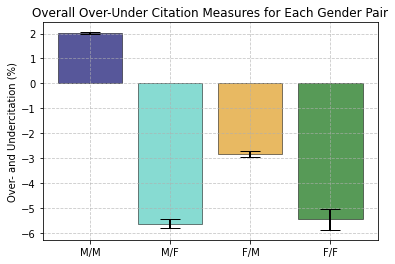

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def fig_plotted(fig_name, delta=delta,
                colors=['navy', 'turquoise', 'orange', 'green'], labels=['M/M', 'M/F', 'F/M', 'F/F']):
    # Define custom colors
    custom_colors = colors

    # Create a bar plot
    sns.barplot(x=labels, y=delta,
                palette=custom_colors,
                alpha=0.7,
                linewidth=0.7,
                edgecolor='black')

    # Add labels and title
    plt.ylabel('Over- and Undercitation (%)')
    plt.title('Overall Over-Under Citation Measures for Each Gender Pair')

    plt.grid(True, linestyle='--', alpha=0.7, zorder=0)


    # Remove the legend
    plt.legend().set_visible(False)

    # Plot error bars
    for i, (calc, interval) in enumerate(zip(delta, se_means)):
        plt.errorbar(i, calc, yerr=interval, color='black', fmt='none', linewidth=2, capsize=10)
        
    #OPTIONAL to limit the y-axis for formatting
    #plt.ylim(-8, 2)

    plt.savefig(f'/Users/akashrathi/Desktop/BrownMed/{fig_name}', format='pdf')

    # Show the plot
    plt.show()

fig_plotted('fig_2_top', delta)

#### Run these same functions for the bottom plot of Figure 2 and each plot in Figure 3, changing which data is being analyzed
#### The model_data codes for each of these is below

Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


95% Confidence Interval: [-3.72333491  2.71302341]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]


95% Confidence Interval: [-7.44989779 -2.83250089]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]


95% Confidence Interval: [-10.24662745  -0.82562833]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]


95% Confidence Interval: [-11.61535038   1.45024608]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


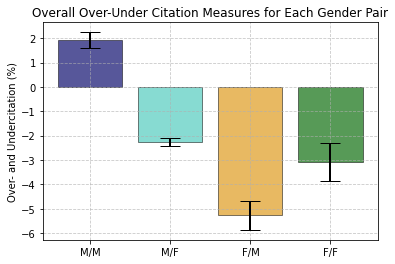

In [38]:
# Figure 2 (bottom)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['total_author_cites']>=11)]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig2_bottom', 'expected_df_fig2_bottom', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig2_bottom',delta)

Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]


95% Confidence Interval: [-4.21767463  4.49489368]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


95% Confidence Interval: [-6.49230208  4.28754391]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]


95% Confidence Interval: [-8.62529722 -1.5579184 ]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]


95% Confidence Interval: [-11.48739228   0.73848745]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


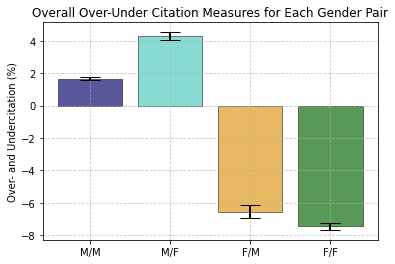

In [39]:
# Figure 3 (MM)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['Gender']=='M/M')]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_MM', 'expected_df_fig3_MM', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig3_MM',delta)

Bootstrapping: 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]


95% Confidence Interval: [-2.55729259  2.48750401]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]


95% Confidence Interval: [-8.30630983 -0.03741028]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]


95% Confidence Interval: [-7.49879445 -2.58555747]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]


95% Confidence Interval: [-12.48185281   2.26637363]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


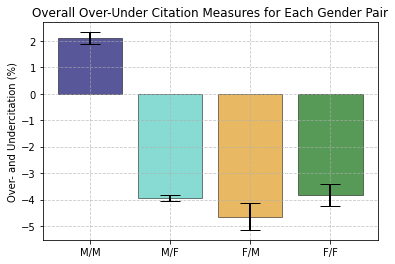

In [40]:
# Figure 3 (Everyone Else)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['Gender']=='M/F') | 
                       (model_data['Gender'] == 'F/M') | (model_data['Gender'] == 'F/F')]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_everyone_else', 'expected_df_fig3_everyone_else', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig3_everyone_else',delta)

Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]


95% Confidence Interval: [-3.31139362  1.27897234]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]


95% Confidence Interval: [-7.12707394 -0.38671292]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]


95% Confidence Interval: [-7.73687666  2.10892382]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]


95% Confidence Interval: [-12.05992739  -0.65391582]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


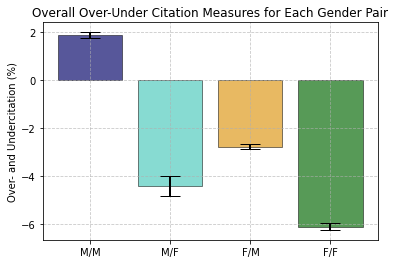

In [41]:
# Figure 3 (MF)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['Gender']=='M/F')]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_MF', 'expected_df_fig3_MF', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig3_MF',delta)

Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


95% Confidence Interval: [-2.93223197  2.05540499]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


95% Confidence Interval: [-9.79488922  1.49341737]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]


95% Confidence Interval: [-9.39993125 -1.94331273]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


95% Confidence Interval: [-10.82555207  -0.52811575]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


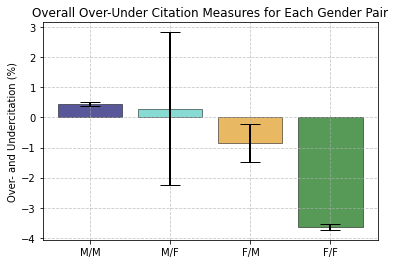

In [42]:
# Figure 3 (FM)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['Gender']=='F/M')]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_FM', 'expected_df_fig3_FM', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig3_FM',delta)

Bootstrapping: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


95% Confidence Interval: [-2.92957696  1.59757823]


Bootstrapping: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]


95% Confidence Interval: [-9.74767431  0.02488841]


Bootstrapping: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]


95% Confidence Interval: [-7.78907447 -0.56938787]


Bootstrapping: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


95% Confidence Interval: [-9.44016826  2.89902962]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


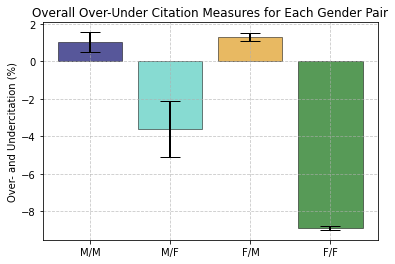

In [43]:
# Figure 3 (FF)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) | (model_data['Gender']=='F/F')]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_FF', 'expected_df_fig3_FF', n_bootstrap=20)

expected = np.array(expected_df.sum())/expected_df.sum().sum()
observed = np.array(model_data[['M/M', 'M/F','F/M','F/F']].sum())/model_data[['M/M', 'M/F','F/M','F/F']].sum().sum()
delta = 100*(observed-expected)/expected
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std((observed_df-expected_df.values)/expected_df.values)/np.sqrt(observed_df.shape[0])


mm_confidence_interval = np.nanpercentile(bootstrap_df['M/M_bootstrap_vals'], [2.5, 97.5])
mf_confidence_interval = np.nanpercentile(bootstrap_df['M/F_bootstrap_vals'], [2.5, 97.5])
fm_confidence_interval = np.nanpercentile(bootstrap_df['F/M_bootstrap_vals'], [2.5, 97.5])
ff_confidence_interval = np.nanpercentile(bootstrap_df['F/F_bootstrap_vals'], [2.5, 97.5])

fig_plotted('fig3_FF',delta)

# Figure 4

### Beginning with the first half of Figure 4 (MM)

In [52]:
# Figure 4 (MM)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics

bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]


def fig4_gam_model(model_data, bootstrap_df, bootstrap_df_name, start_year, end_year, n_bootstrap=1000):
    for year in range(start_year, end_year+1):
      print(year)

      model_data = model_data[(model_data['Publication Year'] == year) | (model_data['Gender']=='M/M')]



      # Define predictors and target
      X = model_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

      # Use LabelEncoder for categorical variables
      label_encoder = LabelEncoder()
      X_encoded = X.copy()
      X_encoded['Journal Name'] = label_encoder.fit_transform(X['Journal Name'])
      X_encoded['Publication Month'] = label_encoder.fit_transform(X['Publication Month'])

      y = model_data['M/M']  # Assuming 'M/M' is the category to predict

      # Number of bootstrap iterations
      n_bootstrap = n_bootstrap


      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      ###DEFINE SAMPLES###
      n_samples = round(0.2*len(y))

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['M/M']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_M/M_observed'] = observed
      bootstrap_df[f'{year}_M/M_expected'] = expected

      # Calculate the 95% confidence interval
      mm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {mm_confidence_interval}')



      y = model_data['M/F']  # Assuming 'M/M' is the category to predict

      # Number of bootstrap iterations


      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['M/F']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_M/F_observed'] = observed
      bootstrap_df[f'{year}_M/F_expected'] = expected

      # Calculate the 95% confidence interval
      mf_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {mf_confidence_interval}')





      y = model_data['F/M']  # Assuming 'M/M' is the category to predict

      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['F/M']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_F/M_observed'] = observed
      bootstrap_df[f'{year}_F/M_expected'] = expected
      # Calculate the 95% confidence interval
      fm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {fm_confidence_interval}')



      y = model_data['F/F']  # Assuming 'M/M' is the category to predict

      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['F/F']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_F/F_observed'] = observed
      bootstrap_df[f'{year}_F/F_expected'] = expected
      # Calculate the 95% confidence interval
      ff_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {ff_confidence_interval}')
    
    bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_df_name}', index=False)

fig4_gam_model(model_data, bootstrap_df, 'fig4_bootstrap_df', 2006, 2023, n_bootstrap=2)

2006


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


95% Confidence Interval: [-4.86898409 -4.14135845]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


95% Confidence Interval: [-1.23527657  2.04868043]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


95% Confidence Interval: [-12.45152254  -5.28062588]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


95% Confidence Interval: [-7.92444152 -4.09690648]
2007


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]


95% Confidence Interval: [-3.01460505 -0.60523878]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


95% Confidence Interval: [-4.12104604 -3.37232572]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


95% Confidence Interval: [-10.03234055  -7.78916456]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


95% Confidence Interval: [-14.86433648 -10.0654934 ]
2008


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


95% Confidence Interval: [-1.56625495 -0.3294918 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


95% Confidence Interval: [-0.88289643  5.67775408]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


95% Confidence Interval: [-8.97676415 -7.94318639]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]


95% Confidence Interval: [-0.70136294  1.1407717 ]
2009


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]


95% Confidence Interval: [-0.66601229  0.65000566]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


95% Confidence Interval: [-4.86097901 -1.74970968]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


95% Confidence Interval: [-6.74558431 -4.97433041]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


95% Confidence Interval: [-13.61426372   0.54152111]
2010


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


95% Confidence Interval: [-3.90855065  1.43692753]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


95% Confidence Interval: [-4.08755025 -2.76847805]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


95% Confidence Interval: [-4.70957582 -4.372238  ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


95% Confidence Interval: [-8.13877371 -8.07776481]
2011


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


95% Confidence Interval: [-0.33908906  0.11045906]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]


95% Confidence Interval: [-2.42951063  1.28992868]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


95% Confidence Interval: [-6.69636451  0.8966306 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


95% Confidence Interval: [-7.43990131 -5.01360734]
2012


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


95% Confidence Interval: [-1.69841485 -0.28811288]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]


95% Confidence Interval: [-5.88689067  1.76052894]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


95% Confidence Interval: [-9.61631768 -5.9214186 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


95% Confidence Interval: [-2.49854593 -0.89616192]
2013


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


95% Confidence Interval: [-3.58164461 -1.67057006]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


95% Confidence Interval: [-4.46717521 -3.14347571]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


95% Confidence Interval: [-8.35880188 -7.88545547]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]


95% Confidence Interval: [-12.73748724  -5.39342568]
2014


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]


95% Confidence Interval: [-1.65542185 -1.57933353]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.99720958  0.16495382]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-6.85884086 -2.54945616]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.16872124  2.02764799]
2015


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-4.57240503 -3.22654218]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-6.87127292 -0.20564927]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-9.74252838 -3.70893001]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.47030422 -0.95270246]
2016


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-2.72010042  2.89522303]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.48696628 -1.07933989]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.81886995 -5.83064177]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-15.71305679  -7.95546539]
2017


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-2.5160188 -2.2027096]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.85601384 -1.48428601]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-9.04394771 -6.54351047]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.03848291 -4.25805375]
2018


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [0.25191285 3.60251883]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.73914499  6.35032909]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.16860889 -3.33038226]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.25523102  5.02329428]
2019


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-1.37647938  2.35677971]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.61274597 -0.58468632]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.60333423 -7.15825077]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.55496145  0.85218221]
2020


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-2.99615111 -0.5903953 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.89346135  1.17856894]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.71980094 -3.06334135]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-11.20407059  -4.17661087]
2021


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-3.37372826  2.57649373]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.04042208  2.50510146]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-6.12360101 -2.61324752]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-15.68037309   3.42463091]
2022


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [1.67662826 1.7118515 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.19220437 -0.77170999]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.09659045 -0.85916554]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]
<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-2.77227406 -0.01052829]
2023


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
<ipython-input-52-9ccb9e855e46>:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-2.18972176 -0.5299791 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
<ipython-input-52-9ccb9e855e46>:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.95277697 -3.16784489]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
<ipython-input-52-9ccb9e855e46>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-52-9ccb9e855e46>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.55525762 -6.82611202]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

95% Confidence Interval: [-5.70168713 -0.04212056]



<ipython-input-52-9ccb9e855e46>:233: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-52-9ccb9e855e46>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-52-9ccb9e855e46>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [72]:
for col in bootstrap_df.columns:
    if 'expected' in col or 'observed' in col:
        # Use apply to sum each array in the column
        bootstrap_df[col] = bootstrap_df[col].apply(np.sum)
        
MM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/M_expected' in col:
    MM_bootstrap_vals.append(bootstrap_df[col].mean())
MM_bootstrap_vals = [x for x in MM_bootstrap_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/F_expected' in col:
    MF_bootstrap_vals.append(bootstrap_df[col].mean())
MF_bootstrap_vals = [x for x in MF_bootstrap_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/M_expected' in col:
    FM_bootstrap_vals.append(bootstrap_df[col].mean())
FM_bootstrap_vals = [x for x in FM_bootstrap_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/F_expected' in col:
    FF_bootstrap_vals.append(bootstrap_df[col].mean())
FF_bootstrap_vals = [x for x in FF_bootstrap_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))



MM_obs = []
for year in range(2006,2024):
    MM_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='M/M')]['M/M'].sum())
MM_errors = np.std(MM_obs, axis=0) / np.sqrt(len(MM_obs))

MF_obs = []
for year in range(2006,2024):
    MF_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='M/F')]['M/F'].sum())
MF_errors = np.std(MF_obs, axis=0) / np.sqrt(len(MF_obs))

FM_obs = []
for year in range(2006,2024):
    FM_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='F/M')]['F/M'].sum())
FM_errors = np.std(FM_obs, axis=0) / np.sqrt(len(FM_obs))

FF_obs = []
for year in range(2006,2024):
    FF_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='F/F')]['F/F'].sum())
FF_errors = np.std(FF_obs, axis=0) / np.sqrt(len(FF_obs))


In [73]:
MM_bootstrap_vals = np.array(MM_bootstrap_vals)
MM_obs = np.array(MM_obs)

MM_obs_line = MM_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
MM_exp_line = MM_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
MM_errors = np.percentile(MM_obs_line,[2.5,97.5])[1]-np.percentile(MM_obs_line,[2.5,97.5])[0]#np.std(MM_obs_line, axis=0) / np.sqrt(len(MM_obs_line))



FM_bootstrap_vals = np.array(FM_bootstrap_vals)
FM_obs = np.array(FM_obs)

FM_obs_line = FM_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
FM_exp_line = FM_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
FM_errors = np.percentile(FM_obs_line,[2.5,97.5])[1]-np.percentile(FM_obs_line,[2.5,97.5])[0]#np.std(FM_obs_line, axis=0) / np.sqrt(len(FM_obs_line))



MF_bootstrap_vals = np.array(MF_bootstrap_vals)
MF_obs = np.array(MF_obs)

MF_obs_line = MF_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
MF_exp_line = MF_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
MF_errors = np.percentile(MF_obs_line,[2.5,97.5])[1]-np.percentile(MF_obs_line,[2.5,97.5])[0]#np.std(MF_obs_line, axis=0) / np.sqrt(len(MF_obs_line))



FF_bootstrap_vals = np.array(FF_bootstrap_vals)
MM_obs = np.array(MM_obs)

FF_obs_line = FF_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
FF_exp_line = FF_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
FF_errors = np.percentile(FF_obs_line,[2.5,97.5])[1]-np.percentile(FF_obs_line,[2.5,97.5])[0]#np.std(FF_obs_line, axis=0) / np.sqrt(len(FF_obs_line))

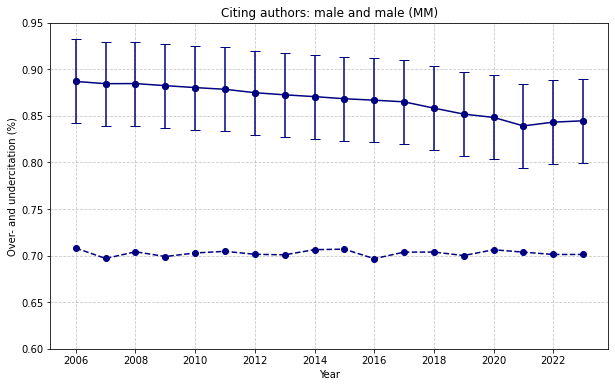

In [74]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_obs_line, label='M/M', marker='o', color = 'navy')
plt.plot(years, MM_exp_line, label='M/M', marker='o', color = 'navy', linestyle='--')

plt.errorbar(years, MM_obs_line, yerr=MM_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
#plt.errorbar(years, MM_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim()
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0.60,0.95)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandM', format='pdf')

# Show the plot
plt.show()

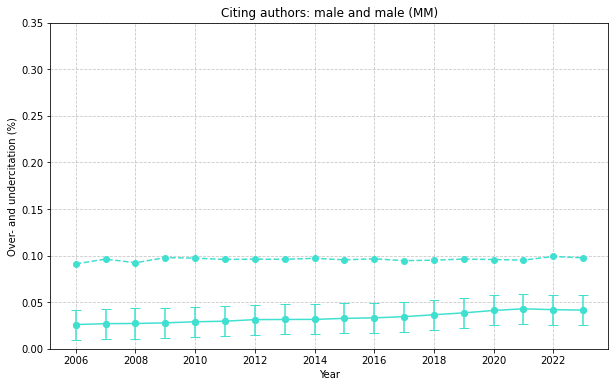

In [75]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MF_obs_line, label='M/M', marker='o', color = 'turquoise')
plt.plot(years, MF_exp_line, label='M/M', marker='o', color = 'turquoise', linestyle='--')

plt.errorbar(years, MF_obs_line, yerr=MF_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'turquoise')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandF', format='pdf')

# Show the plot
plt.show()

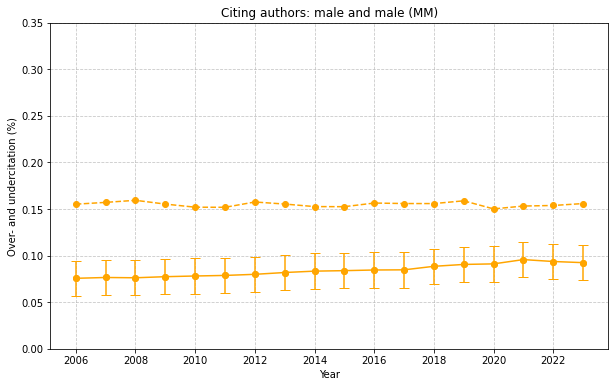

In [76]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, FM_obs_line, label='M/M', marker='o', color = 'orange')
plt.plot(years, FM_exp_line, label='M/M', marker='o', color = 'orange', linestyle='--')

plt.errorbar(years, FM_obs_line, yerr=FM_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'orange')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)


plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandM', format='pdf')

# Show the plot
plt.show()

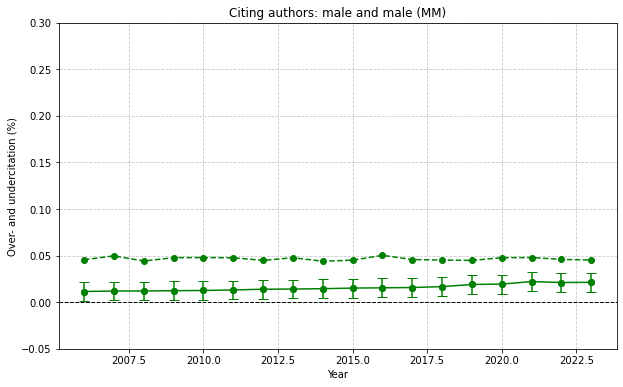

In [77]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

plt.plot(years, FF_obs_line, label='M/M', marker='o', color = 'green')
plt.plot(years, FF_exp_line, label='M/M', marker='o', color = 'green', linestyle='--')

plt.errorbar(years, FF_obs_line, yerr=FF_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'green')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-0.05,0.30)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandF', format='pdf')

# Show the plot
plt.show()

In [78]:
MM_boots = 100*(MM_obs_line-MM_exp_line)/MM_exp_line
MF_boots = 100*(MF_obs_line-MF_exp_line)/MF_exp_line
FM_boots = 100*(FM_obs_line-FM_exp_line)/FM_exp_line
FF_boots = 100*(FF_obs_line-FF_exp_line)/FF_exp_line

MM_error = np.percentile(MM_boots,[2.5,97.5])[1]-np.percentile(MM_boots,[2.5,97.5])[0]#np.std(MM_boots)#/np.sqrt(len(MM_boots))
MF_error = np.percentile(MF_boots,[2.5,97.5])[1]-np.percentile(MF_boots,[2.5,97.5])[0]#np.std(MF_boots)#/np.sqrt(len(MF_boots))
FM_error = np.percentile(FM_boots,[2.5,97.5])[1]-np.percentile(FM_boots,[2.5,97.5])[0]#np.std(FM_boots)#/np.sqrt(len(FM_boots))
FF_error = np.percentile(FF_boots,[2.5,97.5])[1]-np.percentile(FF_boots,[2.5,97.5])[0]#np.std(FF_boots)#/np.sqrt(len(FF_boots))

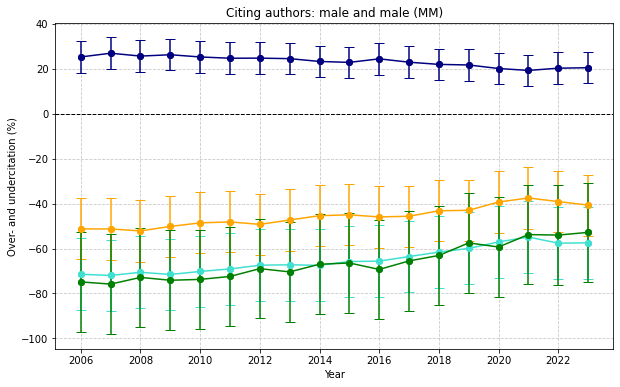

In [79]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_boots, label='M/M', marker='o', color = 'navy')
plt.plot(years, MF_boots, label='M/F', marker='o', color = 'turquoise')
plt.plot(years, FM_boots, label='F/M', marker='o', color = 'orange')
plt.plot(years, FF_boots, label='F/F', marker='o', color = 'green')

plt.errorbar(years, MM_boots, yerr=MM_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
plt.errorbar(years, MF_boots, yerr=MF_error, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')
plt.errorbar(years, FM_boots, yerr=FM_error, label='F/M', marker='o', linestyle='', capsize=5, color = 'orange')
plt.errorbar(years, FF_boots, yerr=FF_error, label='F/F', marker='o', linestyle='', capsize=5, color = 'green')

# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
#plt.ylim(-9,1)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_overall_ex', format='pdf')

# Show the plot
plt.show()


### Now, second half, everyone other than MM

In [80]:
# Figure 4 (MM)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics

bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]


def fig4_gam_model_2(model_data, bootstrap_df, bootstrap_df_name, start_year, end_year, n_bootstrap=1000):
    for year in range(start_year, end_year+1):
      print(year)

      model_data = model_data[(model_data['Publication Year'] == year) | 
                             (model_data['Gender']=='F/F') | (model_data['Gender']=='F/M') | (model_data['Gender']=='M/F')]



      # Define predictors and target
      X = model_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

      # Use LabelEncoder for categorical variables
      label_encoder = LabelEncoder()
      X_encoded = X.copy()
      X_encoded['Journal Name'] = label_encoder.fit_transform(X['Journal Name'])
      X_encoded['Publication Month'] = label_encoder.fit_transform(X['Publication Month'])

      y = model_data['M/M']  # Assuming 'M/M' is the category to predict

      # Number of bootstrap iterations
      n_bootstrap = n_bootstrap


      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      ###DEFINE SAMPLES###
      n_samples = round(0.2*len(y))

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['M/M']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_M/M_observed'] = observed
      bootstrap_df[f'{year}_M/M_expected'] = expected

      # Calculate the 95% confidence interval
      mm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {mm_confidence_interval}')



      y = model_data['M/F']  # Assuming 'M/M' is the category to predict

      # Number of bootstrap iterations


      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['M/F']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_M/F_observed'] = observed
      bootstrap_df[f'{year}_M/F_expected'] = expected

      # Calculate the 95% confidence interval
      mf_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {mf_confidence_interval}')





      y = model_data['F/M']  # Assuming 'M/M' is the category to predict

      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['F/M']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_F/M_observed'] = observed
      bootstrap_df[f'{year}_F/M_expected'] = expected
      # Calculate the 95% confidence interval
      fm_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {fm_confidence_interval}')



      y = model_data['F/F']  # Assuming 'M/M' is the category to predict

      # Initialize list to store bootstrap results
      bootstrap_results = []
      observed = []
      expected = []

      # Fit the GAM model
      gam = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_encoded, y)

      # Predict the probabilities for each category and normalize
      probabilities = gam.predict(X_encoded)

      # Bootstrap loop
      for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
          # Sample with replacement
          sample_indices = np.random.choice(n_samples, n_samples, replace=True)
          X_encoded_reset_index = X_encoded.reset_index(drop=True)
          X_bootstrap = X_encoded_reset_index.iloc[sample_indices]
          y_bootstrap = y.iloc[sample_indices]

          # Fit the GAM model on the bootstrap sample
          gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_bootstrap, y_bootstrap)

          # Predict the probabilities for each category
          probabilities_bootstrap = gam_bootstrap.predict(X_encoded_reset_index)

          # Calculate over- and undercitation measures
          observed_proportions = model_data['F/F']
          expected_proportions_bootstrap = probabilities_bootstrap

          delta_mean_percentage = 100*(observed_proportions.sum()-expected_proportions_bootstrap.sum())/expected_proportions_bootstrap.sum()

          # Append to bootstrap results
          bootstrap_results.append(delta_mean_percentage)
          observed.append(observed_proportions)
          expected.append(expected_proportions_bootstrap)

      bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
      bootstrap_df[f'{year}_F/F_observed'] = observed
      bootstrap_df[f'{year}_F/F_expected'] = expected
      # Calculate the 95% confidence interval
      ff_confidence_interval = np.percentile(bootstrap_results, [2.5, 97.5])

      # Print the confidence interval
      print(f'95% Confidence Interval: {ff_confidence_interval}')
    
    bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_df_name}', index=False)

fig4_gam_model_2(model_data, bootstrap_df, 'fig4_bootstrap_df2', 2006, 2023, n_bootstrap=2)

2006


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]


95% Confidence Interval: [-1.22878293  1.68791582]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]


95% Confidence Interval: [-5.89703687  0.51269616]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


95% Confidence Interval: [-4.54130471 -3.68004792]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


95% Confidence Interval: [ 8.53679262 23.82850983]
2007


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


95% Confidence Interval: [-0.79331565  1.47413832]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


95% Confidence Interval: [-3.93340618 -2.14220599]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]


95% Confidence Interval: [-7.69112848 -1.10968506]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]


95% Confidence Interval: [ 9.27467667 12.470424  ]
2008


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]


95% Confidence Interval: [7.69406591 8.10231806]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]


95% Confidence Interval: [-2.49737262  2.88463885]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]


95% Confidence Interval: [0.52100865 1.89941444]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]


95% Confidence Interval: [-16.79286938  -9.03779151]
2009


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


95% Confidence Interval: [0.88992396 6.58954064]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]


95% Confidence Interval: [0.15038003 6.34317411]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


95% Confidence Interval: [-10.19950016  -5.37070775]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


95% Confidence Interval: [1.35858647 4.00093628]
2010


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]


95% Confidence Interval: [2.63568731 6.51918529]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


95% Confidence Interval: [-1.90782597  0.69840477]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]


95% Confidence Interval: [-3.6561261   1.17210681]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]


95% Confidence Interval: [2.73673683 3.7330278 ]
2011


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]


95% Confidence Interval: [-0.05160168  4.75896522]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]


95% Confidence Interval: [-7.18550342  2.72129232]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


95% Confidence Interval: [-3.10034978  2.46365407]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]


95% Confidence Interval: [-10.68100853  -0.11452446]
2012


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


95% Confidence Interval: [1.16141753 2.42129758]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]


95% Confidence Interval: [-0.91221164  1.73225057]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


95% Confidence Interval: [-14.67618925  -8.63794943]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


95% Confidence Interval: [5.2423087  7.19977561]
2013


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]


95% Confidence Interval: [ 5.14782099 11.53399901]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]


95% Confidence Interval: [-0.68844399  4.48650177]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]


95% Confidence Interval: [-4.62233062 -3.52064387]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]


95% Confidence Interval: [-12.65145179  -3.69079428]
2014


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]


95% Confidence Interval: [2.10689158 4.48091948]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.34308672 -0.78293393]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-10.05812427  -4.04960821]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.86163412  2.24877589]
2015


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [2.59269399 3.67418209]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.19366179  9.29149459]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-11.23818625  -3.16010917]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.35710706 -2.51978898]
2016


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-2.00843846  4.78889799]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.43229317 -3.75328085]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.89380453 -1.7542421 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.61791427 -1.08104456]
2017


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [3.72191784 4.73409643]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-2.64449205  3.78861489]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.37972655  2.48803693]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-16.80732977   4.32055204]
2018


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [1.24347265 7.08416713]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.97659844 -0.48427104]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-4.03754582 -1.27892241]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-12.19968436  -8.05517672]
2019


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [2.14349986 3.2900048 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.76764916 -4.21542174]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-0.13431846  0.83458603]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-16.28416109  -5.95567728]
2020


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [-4.82262683 -0.53719271]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.1144484   4.84754245]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.66924496  0.96234493]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-14.62796001 -10.43756473]
2021


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [0.68755766 4.73994161]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-6.96670128 -1.73548778]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.65409286 -3.51308468]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-5.98698019  8.32249389]
2022


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [1.97372729 7.8423315 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.07916197 -1.04627793]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-3.72972352  0.60680682]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-7.94396051 -7.62394571]
2023


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
<ipython-input-80-12b0fa4037a3>:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

95% Confidence Interval: [4.32571697 6.0760767 ]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
<ipython-input-80-12b0fa4037a3>:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-1.31882388  0.40829053]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]
<ipython-input-80-12b0fa4037a3>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-80-12b0fa4037a3>:187: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

95% Confidence Interval: [-10.54199228  -4.74791467]


Bootstrapping: 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

95% Confidence Interval: [-13.78540015   6.94715741]



<ipython-input-80-12b0fa4037a3>:234: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-80-12b0fa4037a3>:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-80-12b0fa4037a3>:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [81]:
for col in bootstrap_df.columns:
    if 'expected' in col or 'observed' in col:
        # Use apply to sum each array in the column
        bootstrap_df[col] = bootstrap_df[col].apply(np.sum)
        
MM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/M_expected' in col:
    MM_bootstrap_vals.append(bootstrap_df[col].mean())
MM_bootstrap_vals = [x for x in MM_bootstrap_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/F_expected' in col:
    MF_bootstrap_vals.append(bootstrap_df[col].mean())
MF_bootstrap_vals = [x for x in MF_bootstrap_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/M_expected' in col:
    FM_bootstrap_vals.append(bootstrap_df[col].mean())
FM_bootstrap_vals = [x for x in FM_bootstrap_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/F_expected' in col:
    FF_bootstrap_vals.append(bootstrap_df[col].mean())
FF_bootstrap_vals = [x for x in FF_bootstrap_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))



MM_obs = []
for year in range(2006,2024):
    MM_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='M/M')]['M/M'].sum())
MM_errors = np.std(MM_obs, axis=0) / np.sqrt(len(MM_obs))

MF_obs = []
for year in range(2006,2024):
    MF_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='M/F')]['M/F'].sum())
MF_errors = np.std(MF_obs, axis=0) / np.sqrt(len(MF_obs))

FM_obs = []
for year in range(2006,2024):
    FM_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='F/M')]['F/M'].sum())
FM_errors = np.std(FM_obs, axis=0) / np.sqrt(len(FM_obs))

FF_obs = []
for year in range(2006,2024):
    FF_obs.append(data[(data['Publication Year'] == year) | (data['Gender']=='F/F')]['F/F'].sum())
FF_errors = np.std(FF_obs, axis=0) / np.sqrt(len(FF_obs))


In [82]:
MM_bootstrap_vals = np.array(MM_bootstrap_vals)
MM_obs = np.array(MM_obs)

MM_obs_line = MM_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
MM_exp_line = MM_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
MM_errors = np.percentile(MM_obs_line,[2.5,97.5])[1]-np.percentile(MM_obs_line,[2.5,97.5])[0]#np.std(MM_obs_line, axis=0) / np.sqrt(len(MM_obs_line))



FM_bootstrap_vals = np.array(FM_bootstrap_vals)
FM_obs = np.array(FM_obs)

FM_obs_line = FM_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
FM_exp_line = FM_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
FM_errors = np.percentile(FM_obs_line,[2.5,97.5])[1]-np.percentile(FM_obs_line,[2.5,97.5])[0]#np.std(FM_obs_line, axis=0) / np.sqrt(len(FM_obs_line))



MF_bootstrap_vals = np.array(MF_bootstrap_vals)
MF_obs = np.array(MF_obs)

MF_obs_line = MF_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
MF_exp_line = MF_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
MF_errors = np.percentile(MF_obs_line,[2.5,97.5])[1]-np.percentile(MF_obs_line,[2.5,97.5])[0]#np.std(MF_obs_line, axis=0) / np.sqrt(len(MF_obs_line))



FF_bootstrap_vals = np.array(FF_bootstrap_vals)
MM_obs = np.array(MM_obs)

FF_obs_line = FF_obs / (MM_obs + FM_obs+MF_obs+FF_obs)
FF_exp_line = FF_bootstrap_vals / (MM_bootstrap_vals + FM_bootstrap_vals+MF_bootstrap_vals+FF_bootstrap_vals)
FF_errors = np.percentile(FF_obs_line,[2.5,97.5])[1]-np.percentile(FF_obs_line,[2.5,97.5])[0]#np.std(FF_obs_line, axis=0) / np.sqrt(len(FF_obs_line))

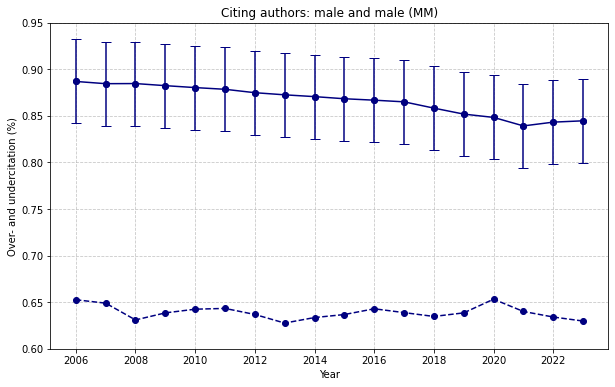

In [83]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_obs_line, label='M/M', marker='o', color = 'navy')
plt.plot(years, MM_exp_line, label='M/M', marker='o', color = 'navy', linestyle='--')

plt.errorbar(years, MM_obs_line, yerr=MM_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
#plt.errorbar(years, MM_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim()
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0.60,0.95)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandM', format='pdf')

# Show the plot
plt.show()

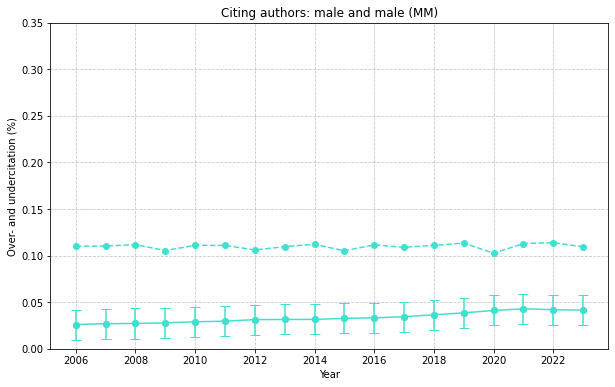

In [84]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MF_obs_line, label='M/M', marker='o', color = 'turquoise')
plt.plot(years, MF_exp_line, label='M/M', marker='o', color = 'turquoise', linestyle='--')

plt.errorbar(years, MF_obs_line, yerr=MF_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'turquoise')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandF', format='pdf')

# Show the plot
plt.show()

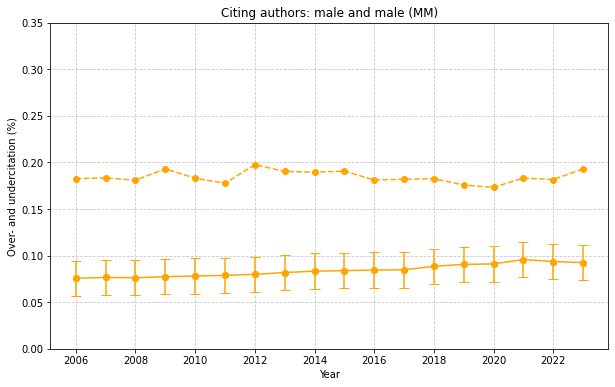

In [85]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, FM_obs_line, label='M/M', marker='o', color = 'orange')
plt.plot(years, FM_exp_line, label='M/M', marker='o', color = 'orange', linestyle='--')

plt.errorbar(years, FM_obs_line, yerr=FM_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'orange')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)


plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandM', format='pdf')

# Show the plot
plt.show()

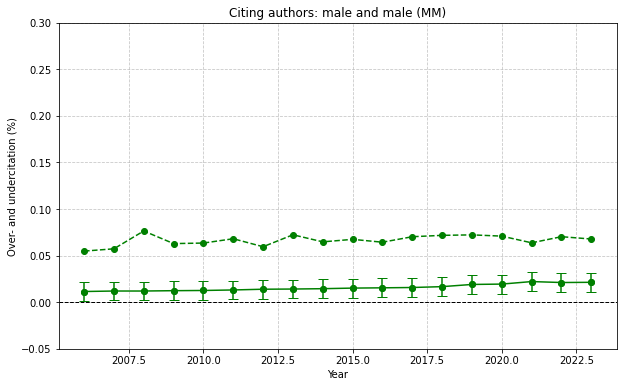

In [86]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

plt.plot(years, FF_obs_line, label='M/M', marker='o', color = 'green')
plt.plot(years, FF_exp_line, label='M/M', marker='o', color = 'green', linestyle='--')

plt.errorbar(years, FF_obs_line, yerr=FF_errors, label='M/M', marker='o', linestyle='', capsize=5, color = 'green')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-0.05,0.30)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandF', format='pdf')

# Show the plot
plt.show()

In [87]:
MM_boots = 100*(MM_obs_line-MM_exp_line)/MM_exp_line
MF_boots = 100*(MF_obs_line-MF_exp_line)/MF_exp_line
FM_boots = 100*(FM_obs_line-FM_exp_line)/FM_exp_line
FF_boots = 100*(FF_obs_line-FF_exp_line)/FF_exp_line

MM_error = np.percentile(MM_boots,[2.5,97.5])[1]-np.percentile(MM_boots,[2.5,97.5])[0]#np.std(MM_boots)#/np.sqrt(len(MM_boots))
MF_error = np.percentile(MF_boots,[2.5,97.5])[1]-np.percentile(MF_boots,[2.5,97.5])[0]#np.std(MF_boots)#/np.sqrt(len(MF_boots))
FM_error = np.percentile(FM_boots,[2.5,97.5])[1]-np.percentile(FM_boots,[2.5,97.5])[0]#np.std(FM_boots)#/np.sqrt(len(FM_boots))
FF_error = np.percentile(FF_boots,[2.5,97.5])[1]-np.percentile(FF_boots,[2.5,97.5])[0]#np.std(FF_boots)#/np.sqrt(len(FF_boots))

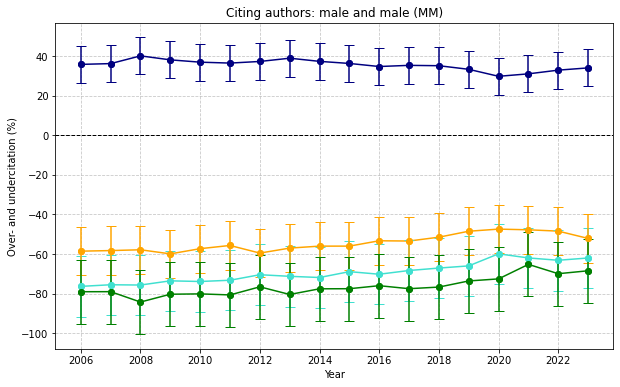

In [88]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2006, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_boots, label='M/M', marker='o', color = 'navy')
plt.plot(years, MF_boots, label='M/F', marker='o', color = 'turquoise')
plt.plot(years, FM_boots, label='F/M', marker='o', color = 'orange')
plt.plot(years, FF_boots, label='F/F', marker='o', color = 'green')

plt.errorbar(years, MM_boots, yerr=MM_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
plt.errorbar(years, MF_boots, yerr=MF_error, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')
plt.errorbar(years, FM_boots, yerr=FM_error, label='F/M', marker='o', linestyle='', capsize=5, color = 'orange')
plt.errorbar(years, FF_boots, yerr=FF_error, label='F/F', marker='o', linestyle='', capsize=5, color = 'green')

# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
#plt.ylim(-9,1)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_overall_ex', format='pdf')

# Show the plot
plt.show()
